In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy as sp
import os

from skimage import img_as_float
from skimage.morphology import reconstruction, h_maxima, h_minima
from skimage import morphology

In [17]:
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction
import numpy as np
from skimage.morphology import h_maxima

In [18]:
# An Unsupervised Approach for Overlapping Cervical Cell Cytoplasm Segmentation

## 1) Cell clump segmentation
### - median filter (5 x 5)
### - adaptive histogram equalization
### - Cytoplasm: OTSU filtering
### - Nucleus: Global-Mean Threshold

## 2) Modified OTSU method with class prior probablility
### - OTSU and class prior probability (pixel * 0.05)

## 3) Cytoplasm segmentation
### - the distance regularized level set evolution

In [19]:
pathdir = '../images/LBC01/'
pathlist = [pathdir + p for p in os.listdir(pathdir)]
pathlist[0:5]

['../images/LBC01/LBC01-20210102(1)_228.png',
 '../images/LBC01/LBC01-20210102(1)_1771.png',
 '../images/LBC01/LBC01-20210102(1)_814.png',
 '../images/LBC01/LBC01-20210102(1)_378.png',
 '../images/LBC01/LBC01-20210102(1)_1268.png']

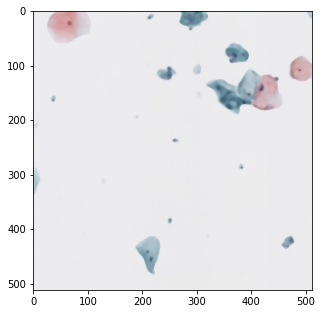

In [53]:
# img = cv2.imread("../../Dataset/papsmear/isbi2015/Training/frame014_stack/fov000.png")
NUMBER = 390
img = cv2.imread(pathlist[NUMBER])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_LINEAR)
img = cv2.medianBlur(img, 7)

plt.figure(figsize=(5, 10))
plt.imshow(img)

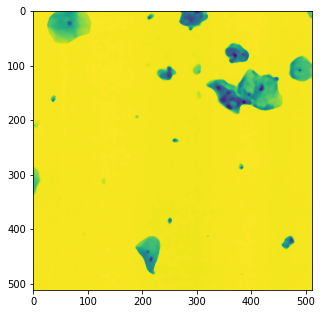

In [54]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(5, 10))
plt.imshow(img)

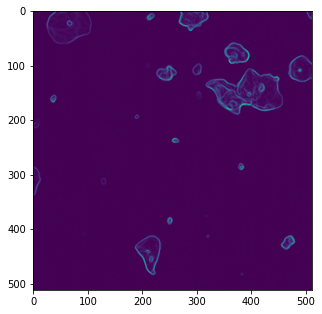

In [76]:
img = cv2.imread(pathlist[NUMBER])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_LINEAR)
img = cv2.medianBlur(img, 7)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ver, hor = np.gradient(img)
# img = (ver + hor)/2
ver = np.square(ver)
hor = np.square(hor)
img = np.sqrt(ver + hor)

plt.figure(figsize=(5, 10))
plt.imshow(img)

In [56]:
img

array([[0.        , 0.        , 0.        , ..., 3.16227766, 6.5       ,
        6.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 3.5       ,
        3.5       ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.5       ],
       ...,
       [0.5       , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

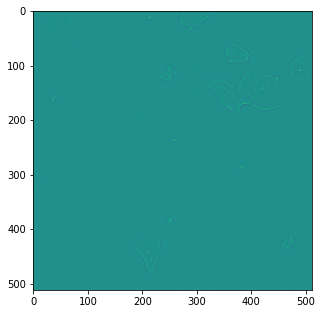

In [62]:
img = cv2.imread(pathlist[NUMBER])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_LINEAR)
img = cv2.medianBlur(img, 7)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.Laplacian(img, cv2.CV_32F)
plt.figure(figsize=(5, 10))
plt.imshow(img)


In [69]:
mask1 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]) 
mask2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]]) 
mask3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

img = cv2.imread(pathlist[NUMBER])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_LINEAR)
img = cv2.medianBlur(img, 7)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

laplacian1 = cv2.filter2D(img, -1, mask1) 
laplacian2 = cv2.filter2D(img, -1, mask2) 
laplacian3 = cv2.filter2D(img, -1, mask3) 
laplacian4 = cv2.Laplacian(img, -1)




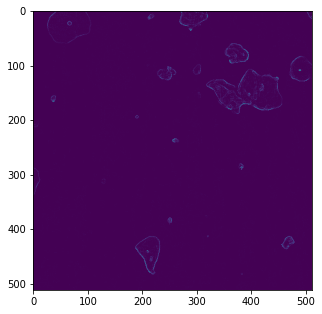

In [74]:
plt.figure(figsize=(5, 10))
plt.imshow(laplacian4)

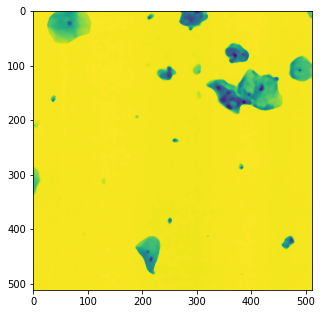

In [78]:
img = cv2.imread(pathlist[NUMBER])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_LINEAR)
img = cv2.medianBlur(img, 7)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(5, 10))
plt.imshow(img)

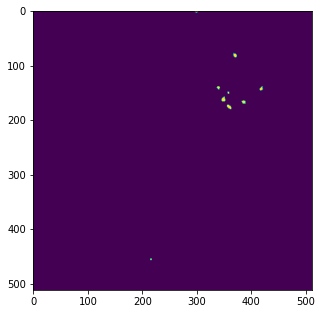

In [88]:
thres = np.percentile(img, 0.1)
img1 = img < thres
plt.figure(figsize=(5, 10))
plt.imshow(img1)

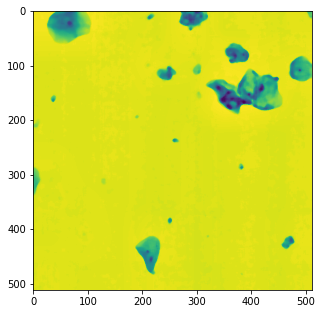

In [144]:
gridsize=8
img = cv2.imread(pathlist[NUMBER])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_LINEAR)
img = cv2.medianBlur(img, 7)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.,tileGridSize=(gridsize,gridsize))
img = clahe.apply(img)
plt.figure(figsize=(5, 10))
plt.imshow(img)

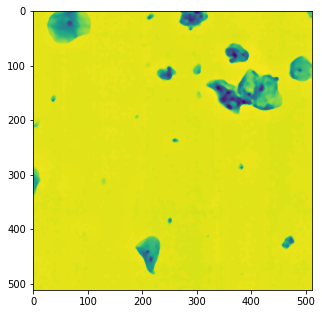

In [139]:
# gridsize=16
# img = cv2.imread(pathlist[NUMBER])
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_LINEAR)
# img = cv2.medianBlur(img, 7)
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# clahe = cv2.createCLAHE(clipLimit=2.,tileGridSize=(gridsize,gridsize))
# img = clahe.apply(img)
# plt.figure(figsize=(5, 10))
# plt.imshow(img)

In [145]:
hist, index = np.histogram(img.ravel(), 255, [0, 255])
# plt.hist(img.ravel(), 235, [0, 234])
cdf_hist = np.cumsum(hist)
grad_hist = np.gradient(cdf_hist)

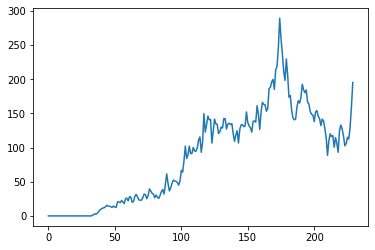

In [148]:
plt.plot(grad_hist[:230])
plt.show()

In [147]:
print(np.max(grad_hist[:220]))
print(np.argmax(grad_hist[:220]))
threshold = np.argmax(grad_hist[:220])

289.0
174


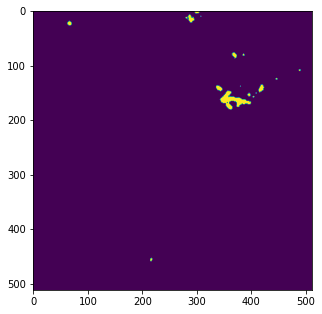

In [155]:
gridsize = 8
img = cv2.imread(pathlist[NUMBER])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_LINEAR)
img = cv2.medianBlur(img, 7)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.,tileGridSize=(gridsize,gridsize))
img = clahe.apply(img)
img1 = img < 90
plt.figure(figsize=(5, 10))
plt.imshow(img1)

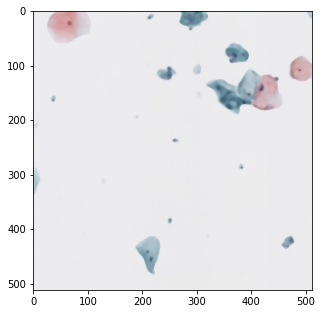

In [157]:
gridsize = 8
img = cv2.imread(pathlist[NUMBER])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_LINEAR)
img = cv2.medianBlur(img, 7)
plt.figure(figsize=(5, 10))
plt.imshow(img)

In [12]:
a = np.array([[10, 7, 6], [3, 2, 1], [3, 2, 1]])
np.percentile(a, 70)

4.799999999999999

In [14]:
f = np.array([1, 1, 4, 7, 11, 16], dtype=float)
np.gradient(f)

array([0. , 1.5, 3. , 3.5, 4.5, 5. ])

3


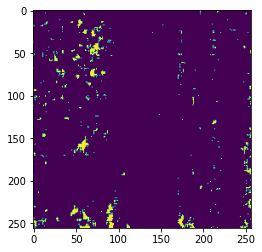

In [78]:
gridsize = 8
img = cv2.imread(pathlist[NUMBER])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img = cv2.resize(img, dsize=(256,256), interpolation=cv2.INTER_LINEAR)
img = cv2.medianBlur(img, 5)

lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

lab_planes = cv2.split(lab)
print(len(lab_planes))

clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(gridsize,gridsize))
lab_planes[0] = clahe.apply(lab_planes[0])

lab = cv2.merge(lab_planes)

rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
# rgb = h_maxima(rgb, 1)
b = rgb[:,:,2]
b = h_maxima(b, 3)
plt.imshow(b)

# plt.figure(figsize=(5, 10))
# plt.imshow(rgb)




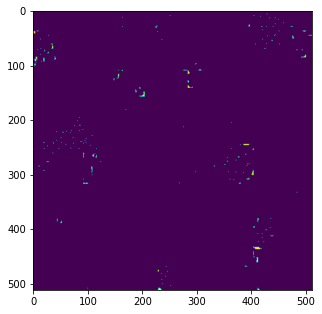

In [95]:
gridsize = 64
img = cv2.imread(pathlist[NUMBER])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_LINEAR)
img = cv2.medianBlur(img, 5)

clahe = cv2.createCLAHE(clipLimit=2.,tileGridSize=(gridsize,gridsize))
img = clahe.apply(img)


img = h_maxima(img, 10)

plt.figure(figsize=(5, 10))
plt.imshow(img)